# PyPSA-Earth Sample Network Analysis

This notebook is an introduction to the analysis of unsolved and solved networks generated by PyPSA-Earth tutorial.  

A related Youtube tutorial with additional explanations can be found [here](https://www.youtube.com/watch?v=2nakM174CME).

## Folder structure and loading networks

Building the folder structure is the first step:

- Start by creating a folder named pypsa-earth-project by executing the following line in the terminal:
    ```
        $ mkdir pypsa-earth-project
    ```
- Change the current directory to that folder:
    ```
        $ cd pypsa-earth-project
    ```
- Clone pypsa-earth repository from GitHub into the folder:
    ```
        $ git clone https://github.com/pypsa-meets-earth/pypsa-earth.git 
    ```
- Finally Clone documentation repository into the folder:
    ```
        $ git clone https://github.com/pypsa-meets-earth/documentation.git
    ```

The following script imports required modules to run the network analysis:

In [1]:
import os
import pypsa
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
import sys
import pandas as pd
from zipfile import ZipFile
import sys



Load networks:

The following table provides a summary of the output networks from the sequencing scripts used in this tutorial case:

| Script                | Network file                             |
| -----------           | -----------                              |
| base_network          | base.nc                                  |
| add_electricity       | elec.nc                                  |
| simplify_network      | elec_s.nc                                |
| cluster_network       | elec_s_6.nc                              |
| add_exta_components   | elec_s_6_ec.nc                           |
| prepare_netwrok       | elec_s_6_ec_lcopt_Co2L-4H.nc (unsolved)  | 
| solve_all_networks    | elec_s_6_ec_lcopt_Co2L-4H.nc (solved)    | 

each of which can be loaded and analysed:

In [2]:
#add_electricity_network = os.getcwd() + "/networks/unsolved/elec.nc"
#clustered_network = os.getcwd() + "/networks/unsolved/elec_s_6.nc"
# n_add_el = pypsa.Network(add_electricity_network)
# n_cluster = pypsa.Network(clustered_network)



base_network= "C:/Users/hie/pe_tan/pypsa-earth/networks/2040_base/base.nc"
n_base= pypsa.Network(base_network) #network with all components available in the data sources 

added_network = "C:/Users/hie/pe_tan/pypsa-earth/networks/2040_base/elec.nc"
n_add = pypsa.Network(added_network) #output from add_electricity. network with electrical parameters added to components in data sources 

simplified_network = "C:/Users/hie/pe_tan/pypsa-earth/networks/2040_base/elec_s.nc"
n_simple = pypsa.Network(simplified_network) #output simplyfy_network with components simplified and spatial parameters (onshore and offshore regions) added  

clustered_network = 'C:/Users/hie/pe_tan/pypsa-earth/networks/2040_base/elec_s_all.nc'
n_cluster = pypsa.Network(clustered_network) #output clustering-network simplified based on number of clusters give

solved_network = r'C:\Users\hie\pe_tan\pypsa-earth\results\2040_base\networks\elec_s_all_ec_lcopt_1h.nc'
n_solve = pypsa.Network(solved_network) #optimized network


INFO:pypsa.io:Imported network base.nc has buses, lines, transformers
INFO:pypsa.io:Imported network elec.nc has buses, carriers, generators, lines, loads, storage_units, transformers
INFO:pypsa.io:Imported network elec_s.nc has buses, carriers, generators, lines, loads, storage_units
INFO:pypsa.io:Imported network elec_s_all.nc has buses, carriers, generators, lines, loads, storage_units
INFO:pypsa.io:Imported network elec_s_all_ec_lcopt_1h.nc has buses, carriers, generators, lines, loads, storage_units


In [3]:
n = n_solve

Plot network nodes and lines by simply executing:

c:\Users\hie\AppData\Local\anaconda3\envs\pypsa-earth\lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning:

facecolor will have no effect as it has been defined as "never".



(<matplotlib.collections.PatchCollection at 0x23d1a785150>,
 <matplotlib.collections.LineCollection at 0x23d1adb3eb0>)

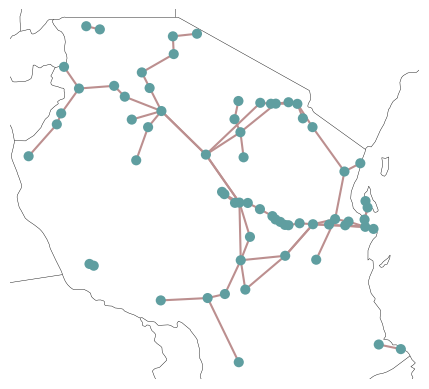

In [4]:
n.plot()

## Network components

PyPSA has a group of components tha are already built-in such as generators, loads, lines, etc.. While allowing the user to override this and build their custom components, read more at [PyPSA Design](https://pypsa.readthedocs.io/en/latest/components.html#groups-of-components). 

The built-in components can be static or time-varying. Time-varying components can be obtained by adding `_t` to the component:

- network.generator     &rarr; static component
- network.generator_t   &rarr; time-varying component

A list of the buit-in PyPSA components and their associated attributes can be found at [PyPSA Components](https://pypsa.readthedocs.io/en/latest/components.html).

For example, the [Generator](https://pypsa.readthedocs.io/en/latest/components.html#generator) component has an attribute of `p_nom_opt`, which represent the optimised nominal power. This output can be obtained by the following line:


In [5]:
n.generators.p_nom_opt.head(2) # "head" returns the first 2 rows

Generator
C31    560.952922
C32    490.265451
Name: p_nom_opt, dtype: float64

To get the number of components and snapshots in the network: 

In [6]:
n

PyPSA Network 'PyPSA-Earth'
Components:
 - Bus: 67
 - Carrier: 13
 - Generator: 232
 - Line: 73
 - Load: 67
 - StorageUnit: 16
Snapshots: 8760

## Network analysis

The following network analysis scripts were inspired by the work of Fabian Neumann in this [video](https://www.youtube.com/watch?v=mAwhQnNRIvs&t=734s) with PyPSA-EUR, which has a similar model structure as PyPSA-Earth

## Static components data


Static data for various components such as generators, lines and storage units can be obtained directly through the following lines, with the ability to manipulate the data:

In [7]:
n.lines.head(2)

,v_nom,bus0,bus1,length,dc,geometry,bounds,carrier,type,s_max_pu,...,s_nom_max,lifetime,terrain_factor,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu
Line,,,,,,,,,,,,,,,,,,,,,
0,380.0,21,29,43.985476,False,"MULTILINESTRING ((38.7439 -6.7116, 38.74378869...",MULTIPOINT ((38.357321400000096 -6.63929209999...,AC,Al/St 240/40 4-bundle 380.0,0.9,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
1,380.0,36,30,181.143759,False,MULTILINESTRING ((38.61499740000011 -5.2978653...,MULTIPOINT ((37.73768980000001 -4.071734399999...,AC,Al/St 240/40 4-bundle 380.0,0.9,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0


In [8]:
n.generators.head(2)

,carrier,bus,p_nom_min,p_nom,p_nom_extendable,efficiency,marginal_cost,capital_cost,build_year,lifetime,...,q_set,marginal_cost_quadratic,committable,start_up_cost,shut_down_cost,stand_by_cost,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
Generator,,,,,,,,,,,,,,,,,,,,,
C31,CCGT,2,102.0,102.0,True,0.58,46.813041,126181.845894,2007,20.0,...,0.0,0.0,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
C32,CCGT,2,189.0,189.0,True,0.58,46.813913,126181.845894,2006,20.0,...,0.0,0.0,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0


In [9]:
n.storage_units.head(50)

,carrier,bus,p_nom,max_hours,p_min_pu,efficiency_dispatch,efficiency_store,cyclic_state_of_charge,marginal_cost,build_year,...,sign,marginal_cost_quadratic,capital_cost,lifetime,state_of_charge_initial,state_of_charge_initial_per_period,state_of_charge_set,cyclic_state_of_charge_per_period,standing_loss,inflow
StorageUnit,,,,,,,,,,,,,,,,,,,,,
0 hydro,hydro,33,200.000000,212.872523,0.0,0.9,0.0,True,0.009920,0,...,1.0,0.0,0.0,inf,0.0,False,NaN,True,0.0,0.0
2 hydro,hydro,16,80.000000,212.872523,0.0,0.9,0.0,True,0.010793,0,...,1.0,0.0,0.0,inf,0.0,False,NaN,True,0.0,0.0
4 hydro,hydro,49,7.125972,212.872523,0.0,0.9,0.0,True,0.009380,0,...,1.0,0.0,0.0,inf,0.0,False,NaN,True,0.0,0.0
6 hydro,hydro,71,2115.000000,212.872523,0.0,0.9,0.0,True,0.009412,0,...,1.0,0.0,0.0,inf,0.0,False,NaN,True,0.0,0.0
7 hydro,hydro,80,27.000000,212.872523,0.0,0.9,0.0,True,0.010034,0,...,1.0,0.0,0.0,inf,0.0,False,NaN,True,0.0,0.0
8 hydro,hydro,81,300.000000,212.872523,0.0,0.9,0.0,True,0.009139,0,...,1.0,0.0,0.0,inf,0.0,False,NaN,True,0.0,0.0
9 hydro,hydro,23,358.000000,212.872523,0.0,0.9,0.0,True,0.010517,0,...,1.0,0.0,0.0,inf,0.0,False,NaN,True,0.0,0.0
11 hydro,hydro,8,90.100000,212.872523,0.0,0.9,0.0,True,0.010609,0,...,1.0,0.0,0.0,inf,0.0,False,NaN,True,0.0,0.0
12 hydro,hydro,8,81.600000,212.872523,0.0,0.9,0.0,True,0.010784,0,...,1.0,0.0,0.0,inf,0.0,False,NaN,True,0.0,0.0


In [10]:
n.stores.head(2)

attribute,bus,type,carrier,e_nom,e_nom_mod,e_nom_extendable,e_nom_min,e_nom_max,e_min_pu,e_max_pu,...,p_set,q_set,sign,marginal_cost,marginal_cost_quadratic,capital_cost,standing_loss,build_year,lifetime,e_nom_opt
Store,,,,,,,,,,,,,,,,,,,,,


In [11]:
n.loads.head(2) # no results because loads are mostly time dependent

,bus,carrier,type,p_set,q_set,sign
Load,,,,,,
0,2,,,0.0,0.0,-1.0
3,4,,,0.0,0.0,-1.0


## Time-varying components data

PyPSA-Earth has several components to refelct time-varying behaviour of energy systems, including loads, generators, storage units, etc..

Excute the following line to get results of time-varying load:

In [12]:
n.loads_t.p_set.head(2)

Load,0,3,5,8,9,11,13,16,17,19,...,75,76,77,78,79,80,81,82,83,84
snapshot,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,441.727355,128.686869,16.741597,149.414466,29.615465,115.143593,13.875598,61.188202,110.431848,59.555541,...,34.246945,4.817207,145.631361,131.345604,370.536797,54.133105,235.035285,5.055442,43.415724,190.503822
2013-01-01 01:00:00,468.769175,136.564867,17.766490,158.561373,31.428475,122.192494,14.725039,64.934042,117.192304,63.201433,...,36.343487,5.112108,154.546673,139.386365,393.220448,57.447044,249.423758,5.364928,46.073563,202.166151


Aggregate time-varying loads along columns to get aggregated time series for the whole system, and plot them using the following line

<AxesSubplot:xlabel='snapshot', ylabel='MW'>

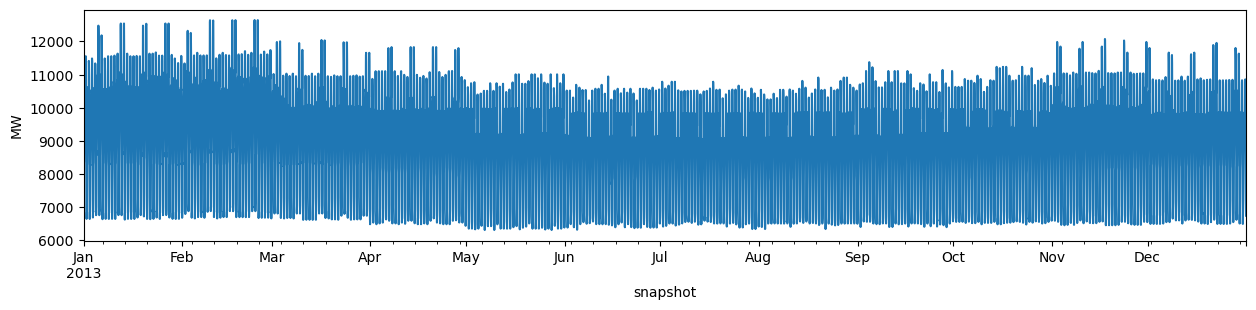

In [13]:
n.loads_t.p_set.sum(axis=1).plot(figsize=(15,3), ylabel="MW")

Time-varying capacity factors for renewable generators

In [14]:
n.generators_t.p_max_pu.head(2)

Generator,0 onwind,0 solar,1 hydro,10 hydro,11 onwind,11 solar,13 hydro,13 onwind,13 solar,14 hydro,...,81 onwind,81 solar,82 onwind,82 solar,83 onwind,83 solar,84 onwind,84 solar,9 onwind,9 solar
snapshot,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,0.060296,0.0,0.743708,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-01 01:00:00,0.052575,0.0,0.646837,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Specify a particular time period and generator location for the capacity factor:

In [15]:
#n.generators_t.p_max_pu.loc["2013-03", "TZ 2 solar"].plot(figsize=(15,3))

In [16]:
#n.generators_t.p_max_pu.loc["2013-03-01":"2013-03-05", "BJ16 0 onwind"].plot(figsize=(15,3))

## Solved network outputs

Aftwer solving the network, optimized outputs and system costs can be obtained and analysed

Total annual system costs in billion euros per year:

In [17]:
n.objective / 1e9

29768.31237153099

Transmission lines Expansion:

In [18]:
(n.lines.s_nom_opt - n.lines.s_nom).head(5) # optimized line capacity compared to original capacity

Line
0    584.148567
1    131.522046
2    455.805410
3      0.009841
4    589.039765
dtype: float64

Optimised generator capacity:

In [19]:
n.generators.groupby("carrier").p_nom_opt.sum() / 1e3 # GW

# Note: the "load" in the generators represents the Demand Side Response to match the power demand with the supply.

carrier
CCGT          5.025265e+00
OCGT          1.850000e-01
coal          6.020860e-01
geothermal    9.950000e-01
load          6.700000e+07
onwind        1.370000e+00
ror           6.017862e-01
solar         3.000000e+00
Name: p_nom_opt, dtype: float64

Optimised storage capacity:

In [20]:
n.storage_units.groupby("carrier").p_nom_opt.sum() / 1e3 # GW

carrier
hydro    4.340626
Name: p_nom_opt, dtype: float64

Average daily state of charge for storage units:

<AxesSubplot:xlabel='snapshot'>

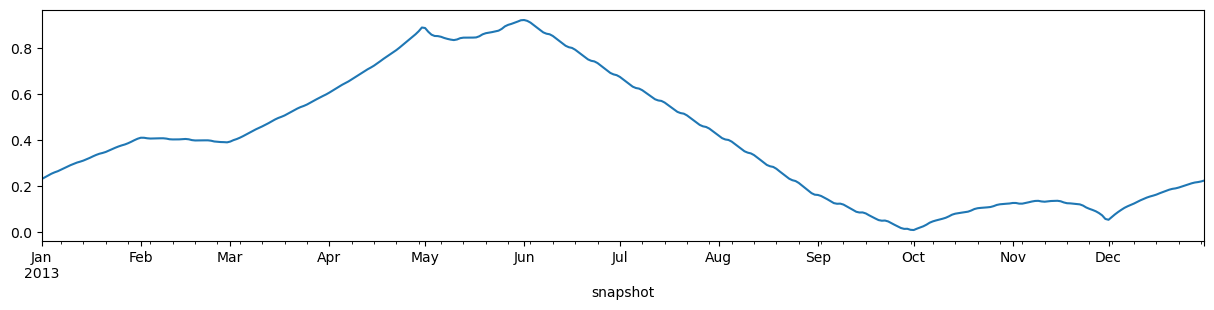

In [21]:
(n.storage_units_t.state_of_charge.sum(axis=1).resample("D").mean() / 1e6).plot(figsize=(15,3)) #TWh

State of charge for a period of time to a particular storage technology:

<AxesSubplot:xlabel='snapshot'>

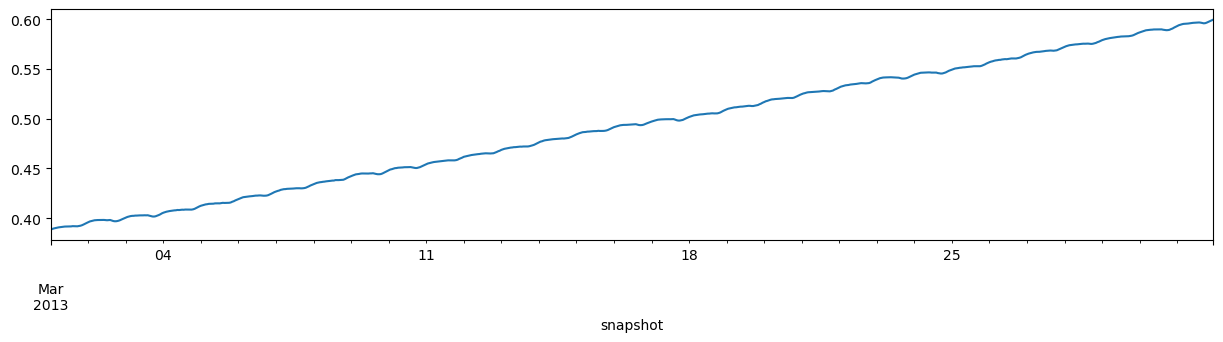

In [22]:
(n.storage_units_t.state_of_charge.loc["2013-03"].filter(like="hydro", axis=1).sum(axis=1) / 1e6).plot(figsize=(15,3)) #TWh

## Network Statistics

It is possible to get direct analysis values of the network and plot them, including Capacity Factor, Capital Expenditure, Curtailment, Installed Capacity, Operational Expenditure, Optimal Capacity, Revenue, Supply and Withdrawal

In [23]:
n.statistics()

# Note: the "load" in the generators represents the Demand Side Response to match the power demand with the supply.

Optimal Capacity  Installed Capacity  \
Generator   Coal                    6.020860e+02        6.000000e+02   
            Combined-Cycle Gas      5.025265e+03        1.192700e+03   
            Geothermal              9.950000e+02        1.350000e+02   
            Onshore Wind            1.370000e+03        9.110670e-01   
            Open-Cycle Gas          1.850000e+02        1.850000e+02   
            Run of River            6.017862e+02        6.017862e+02   
            Solar                   3.000000e+03        1.447219e+01   
            load                    6.700000e+10        6.700000e+10   
Line        AC                      6.159941e+04        3.477151e+04   
Load        -                       0.000000e+00        0.000000e+00   
StorageUnit Reservoir & Dam         4.340626e+03        4.340626e+03   

                                      Supply    Withdrawal      Dispatch  \
Generator   Coal                5.269048e+06  0.000000e+00  5.269048e+06   
            Combined-Cycle Gas  3.549498e+07  0.000000e+00  3.549498e+07   
            Geothermal          8.707822e+06  0.000000e+00  8.707822e+06   
            Onshore Wind        9.130155e+05  0.000000e+00  9.130155e+05   
            Open-Cycle Gas      4.066085e+05  0.000000e+00  4.066085e+05   
            Run of River        2.920437e+06  0.000000e+00  2.920437e+06   
            Solar               3.118284e+06  0.000000e+00  3.118284e+06   
            load                3.720686e+06  0.000000e+00  3.720686e+06   
Line        AC                  2.596753e+08  2.596753e+08  0.000000e+00   
Load        -                   0.000000e+00  7.885000e+07 -7.885000e+07   
StorageUnit Reservoir & Dam     1.829911e+07  0.000000e+00  1.829911e+07   

                                Transmission  Capacity Factor   Curtailment  \
Generator   Coal                0.000000e+00         0.999009  0.000000e+00   
            Combined-Cycle Gas  0.000000e+00         0.806314  0.000000e+00   
            Geothermal          0.000000e+00         0.999039  0.000000e+00   
            Onshore Wind        0.000000e+00         0.076077  2.341991e+05   
            Open-Cycle Gas      0.000000e+00         0.250900  0.000000e+00   
            Run of River        0.000000e+00         0.553989  6.475558e+04   
            Solar               0.000000e+00         0.118656  1.259542e+06   
            load                0.000000e+00         0.000006  0.000000e+00   
Line        AC                  6.252681e+06         0.481227  0.000000e+00   
Load        -                   0.000000e+00              NaN  0.000000e+00   
StorageUnit Reservoir & Dam     0.000000e+00         0.481253  0.000000e+00   

                                Capital Expenditure  Operational Expenditure  \
Generator   Coal                       2.658205e+08             1.697815e+08   
            Combined-Cycle Gas         6.340972e+08             1.661625e+09   
            Geothermal                 0.000000e+00             8.239555e+04   
            Onshore Wind               1.775253e+08             2.227277e+04   
            Open-Cycle Gas             1.090340e+07             2.630498e+07   
            Run of River               2.465120e+08             3.005263e+04   
            Solar                      1.448679e+08             6.069149e+04   
            load                       0.000000e+00             2.976552e+13   
Line        AC                         3.417679e+08             0.000000e+00   
Load        -                          0.000000e+00             0.000000e+00   
StorageUnit Reservoir & Dam            0.000000e+00             1.777125e+05   

                                     Revenue  Market Value  
Generator   Coal                3.255892e+08  6.179280e+01  
            Combined-Cycle Gas  2.295340e+09  6.466659e+01  
            Geothermal          5.642493e+08  6.479799e+01  
            Onshore Wind        4.558139e+12  4.992400e+06  
            Open-Cycle Gas      4.18352

Plotting the capital expendture for various generators:

<AxesSubplot:ylabel='Euros'>

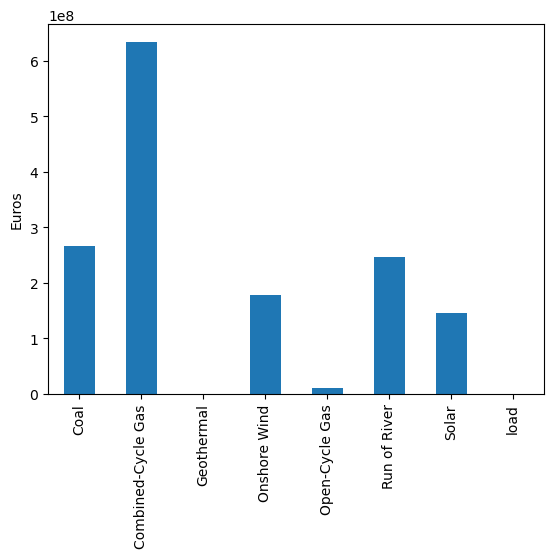

In [24]:
n.statistics()["Capital Expenditure"].loc["Generator"].plot.bar(ylabel="Euros")

## Sample plots of networks and outputs

Plot lines and their loading:

c:\Users\hie\AppData\Local\anaconda3\envs\pypsa-earth\lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning:

facecolor will have no effect as it has been defined as "never".



(29.28284, 40.72636, -11.111030000000001, -0.7813699999999999)

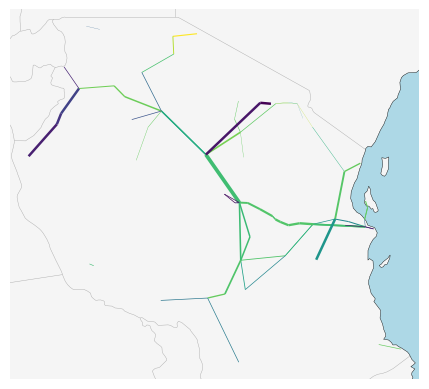

In [25]:
loading = (n.lines_t.p0.abs().mean().sort_index() / (n.lines.s_nom_opt*n.lines.s_max_pu).sort_index()).fillna(0.)
# Example types of projections: PlateCarree, Mercator, Orthographic
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})
n.plot(ax=ax,
    bus_colors="gray",
    branch_components=["Line"],
    line_widths=n.lines.s_nom_opt/1e3,
    line_colors=loading,
    line_cmap=plt.cm.viridis,
    color_geomap=True,
    bus_sizes=0
)
ax.axis('off')

Plot hourly dispatch in a particular period of time:

snapshot    2013-03-01 00:00:00  2013-03-01 01:00:00  2013-03-01 02:00:00  \
carrier                                                                     
CCGT                1427.746598          1741.882164          2420.105661   
OCGT                   0.618061             0.621023             0.625802   
coal                 601.044506           601.105041           601.158524   
geothermal           993.921593           993.933790           993.946194   
load              544341.132912        604847.615332        704890.781020   
onwind                83.844089            67.212905            63.249500   
ror                  529.155449           533.297794           518.473952   
solar                  0.000000             0.000000             0.000000   

snapshot    2013-03-01 03:00:00  2013-03-01 04:00:00  2013-03-01 05:00:00  \
carrier                                                                     
CCGT                2540.773380          3008.315389          3418.238652  

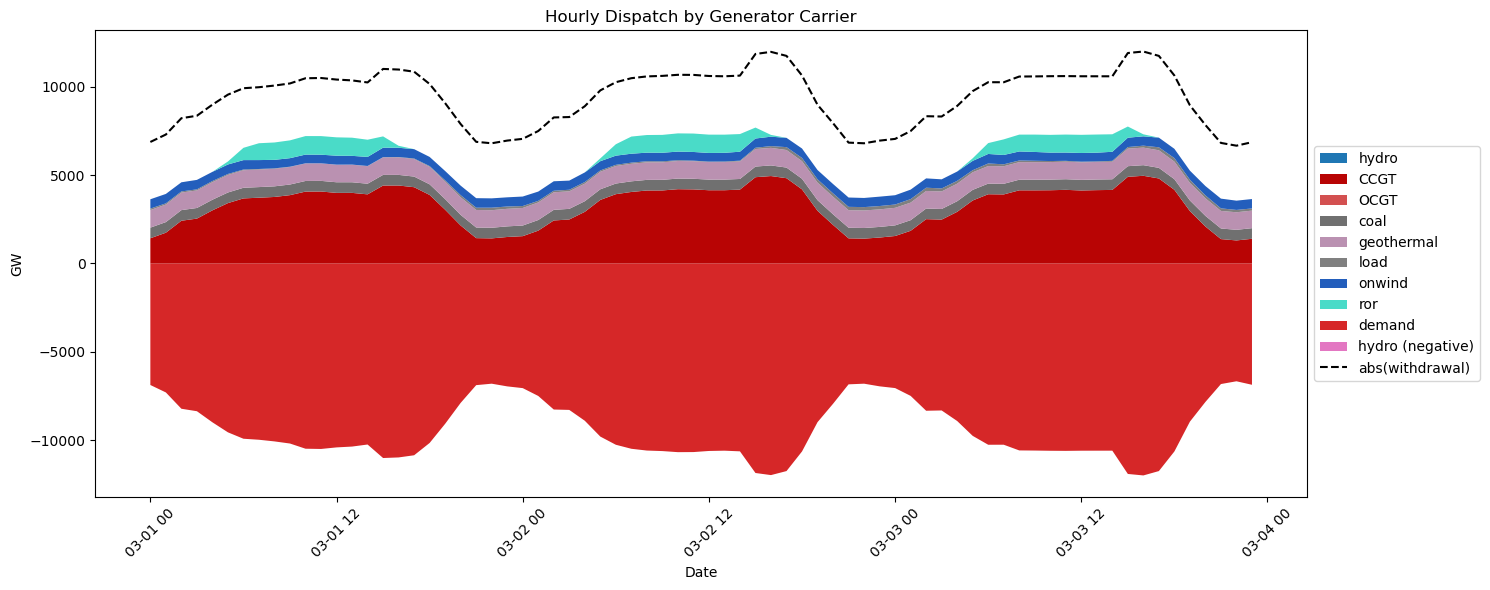

In [26]:
# Define the time period
first_date = "2013-03-01"
second_date = "2013-03-03"

# Group and sum generator dispatch by carrier
dispatch = n.generators_t.p.loc[first_date:second_date].T.groupby(n.generators.carrier).sum()

print(dispatch)

# Ensure all carriers are included
for carrier in ["solar", "coal", "CCGT", "OCGT", "onwind", "geothermal", "ror"]:
    if carrier not in dispatch.index:
        dispatch.loc[carrier] = 0
# Add demand and storage components
demand = n.loads_t.p_set.loc[first_date:second_date].sum(axis=1) * -1
demand.name = "demand"

# Ensure hydro is a Series, even if not present
hydro = n.storage_units_t.p.loc[first_date:second_date].T.groupby(n.storage_units.carrier).sum().get("hydro", pd.Series(0, index=demand.index))

# Prepare supply and withdrawal stacks
supply = [
    hydro.where(hydro > 0, 0),
    *[dispatch.loc[carrier] for carrier in dispatch.index if carrier not in ["load"]]
]
withdrawal = [
    demand,
    hydro.where(hydro < 0, 0)
]

# Plot the dispatch
fig, ax = plt.subplots(figsize=(15, 6))

# Stackplot for supply
plt.stackplot(
    demand.index,
    *supply,
    labels=[f"{carrier}" for carrier in ["hydro"] + list(dispatch.index)],
    colors=["#1f77b4"] + [n.carriers.color.get(carrier, "gray") for carrier in dispatch.index],
    zorder=99
)

# Stackplot for withdrawal
plt.stackplot(
    demand.index,
    *withdrawal,
    labels=["demand", "hydro (negative)"],
    colors=["#d62728", "#e377c2"],
    zorder=1
)

# Add a line for absolute withdrawal
plt.plot(demand.index, withdrawal[0].abs(), color="black", label="abs(withdrawal)", linestyle="dashed", zorder=100)

# Formatting the plot
plt.xticks(rotation=45)
ax.set_ylabel("GW")
ax.set_xlabel("Date")
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("Hourly Dispatch by Generator Carrier")
plt.tight_layout()
plt.show()

NameError: name 'custom_colors' is not defined

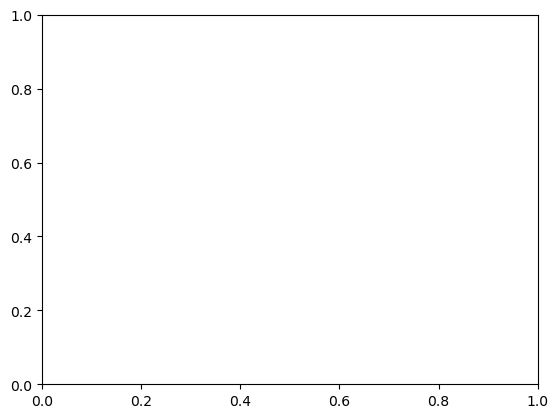

In [27]:
first_date = "2013-03-01"
second_date = "2013-03-03"
CCGT = n.generators_t.p.loc[first_date:second_date].T.groupby(n.generators.carrier).sum().loc["CCGT"]
OCGT = n.generators_t.p.loc[first_date:second_date].T.groupby(n.generators.carrier).sum().loc["OCGT"]
Onwind = n.generators_t.p.loc[first_date:second_date].T.groupby(n.generators.carrier).sum().loc["onwind"]
solar = n.generators_t.p.loc[first_date:second_date].T.groupby(n.generators.carrier).sum().loc["solar"]
geothermal= n.generators_t.p.loc[first_date:second_date].T.groupby(n.generators.carrier).sum().loc["geothermal"]
#biomass = n.generators_t.p.loc[first_date:second_date].T.groupby(n.generators.carrier).sum().loc["biomass"]
coal = n.generators_t.p.loc[first_date:second_date].T.groupby(n.generators.carrier).sum().loc["coal"]
#oil = n.generators_t.p.loc[first_date:second_date].T.groupby(n.generators.carrier).sum().loc["oil"]
ror= n.generators_t.p.loc[first_date:second_date].T.groupby(n.generators.carrier).sum().loc["ror"]


hydro = n.storage_units_t.p.loc[first_date:second_date].T.groupby(n.storage_units.carrier).sum().loc["hydro"]

demand = n.loads_t.p_set.loc[first_date:second_date].sum(axis=1)*-1

# names for labels
demand.name = "demand"

fig, ax=plt.subplots()
 
plt.stackplot(
    CCGT.index,
    supply:=(hydro.where(hydro > 0, 0), CCGT, OCGT, Onwind,  solar, solar, geothermal,  coal,  ror), 
    labels=[key.name for key in supply],
    colors=[custom_colors.get(source.name, default="gray") for source in supply], 
    zorder = 99
)
plt.stackplot(
    CCGT.index,
    withdrawal:=(demand, hydro.where(hydro < 0, 0)),
    labels=[source.name for source in withdrawal],
    colors=[n.carriers.color.get(key.name, default="red") for key in withdrawal], 
    zorder = 1
)
plt.plot(sum(withdrawal).abs(), color = "black", label="abs(withdrawal)", linestyle="dashed", zorder=100)


plt.xticks(rotation = 45)
plt.yticks()
scale_y = 1e3
ticks_y = ticker.FuncFormatter(lambda x, pos: "{0:g}".format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)
myFmt = mdates.DateFormatter("%d")
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel("GW")
ax.set_xlabel("Mar")

handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))  # remove duplicates

plt.legend(unique_labels.values(), unique_labels.keys(), loc="center right", bbox_to_anchor=(1.4, 0.5))
plt.show()
#fig.savefig("path")

## Additional analysis and validation

The following notebooks provide additional analysis, plots and validation of the networks:

[Plot osm network](./0_build_osm_network_plot.ipynb)

[Explore network](./0_network_exploration.ipynb)

[Check outputs of build_shapes script](./0build_shapes.ipynb)

[Compare shapes for countries](./0shape_comparison.ipynb)

[Check base network](./base_network.ipynb)

[Check outputs of add_electricity script](./add_electricity.ipynb)

[Check outputs of augmented_line_connections script](./augmented_line_connections.ipynb)

[Test the built cutouts](./build_cutout.ipynb)

[Test the renewable profiles](./build_renewable_profiles.ipynb)

[Check land use availability](./land_use_availability.ipynb)

[Check network characteristics before solving](./network_characteristics_before_solve.ipynb)

[Some nice plots for presentations](./nice_plotting_for_presentations.ipynb)

[Download OSM and make adjustments](./openstreetmap_download_and_adjustments.ipynb)

[Visualise clustering](./visualise_clustering.ipynb)

The following notebooks could be used for validation:

[Capacity validation](./capacity_validation.ipynb)

[Demand validation](./demand_validation.ipynb)

[Hydro generation validation](./hydro_generation_validation.ipynb)

[Network validation](./network_validation.ipynb)

[Renewable potential validation](./renewable_potential_validation.ipynb)


